In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# graph style(격자)
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# set fonts on windows
# plt.rc('font', family='Malgun Gothic')
# mac
plt.rc('font', family='AppleGothic')


## Data Load

In [2]:
df = pd.read_csv('./suggestion.csv')
df.shape

(236, 8)

## Preview data

In [3]:
df.head()

,sgId,title,category,content,start,end,vote,author
0,280,행정기관 소속 위원회 위원 개인정보 및 안건 공개 기준에 관한 법적 근거 마련,일반행정,"ㅁ 현황ㅇ 법령에 따라 설치되는 행정기관 소속 위원회들이 다수 운영되고 있으며, ...",2019.10.16,2020.01.13,0,법제혁신
1,279,초과근무 줄이기!,일반행정,1. 문제점* 초과근무를 많이 할수록 일을 열심히 하고 있다고 생각하는 조직 문화*...,2019.10.16,2020.01.13,2,ㅁㄴㅁ
2,278,원스톱 의원요구자료 제출 시스템 구축,일반행정,​​□ 제안제목○ 원스톱 의원요구자료 제출 시스템 구축□현황 및 문제점○ 각부처 별...,2019.10.15,2020.01.12,0,연시랑
3,277,예산을 공평하게 분배,사회통합,제목 : 예산을 부처별 공평하게 분배후 차후평가문제점 : 1. 예산편성 삭감원칙으...,2019.10.15,2020.01.12,3,슈퍼맨119
4,276,공무원 인트라넷 통합메신저,일반행정,"부처별,기관별로 자체 인트라넷 메신저가 활성화되며,신속한 업무 추진과 협조에 큰 도...",2019.10.15,2020.01.12,0,페이소스


In [4]:
df.tail(2)

,sgId,title,category,content,start,end,vote,author
234,2,공무원 전입시험의 투명성 확보방안,반부패청렴,현직 공무원들의 타기관이나 상급기관에 전입시험시투명성을 높이는 방안을 마련했으면 합...,2018.08.01,2018.08.31,7,음지가양지된다
235,1,어린이집 차량내 어린이 질식사고 등에 대한 상세한 대책이 필요하다.,안전,"최근 동두천 어린이집 차량내 어린이 질식사고가 발생하여, 이에 대한 여러가지 대책을...",2018.07.24,2018.08.23,14,헌비


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sgId      236 non-null    int64 
 1   title     236 non-null    object
 2   category  236 non-null    object
 3   content   234 non-null    object
 4   start     236 non-null    object
 5   end       236 non-null    object
 6   vote      236 non-null    int64 
 7   author    233 non-null    object
dtypes: int64(2), object(6)
memory usage: 14.9+ KB


In [6]:
# help(docstring) : shift+tap
df.describe(include='all')

,sgId,title,category,content,start,end,vote,author
count,236.000000,236,236,234,236,236,236.000000,233
unique,NaN,236,11,234,145,145,NaN,162
top,NaN,연가 기부제 도입,일반행정,1. 새 정부에서는 국민이 주인이 정부를 실현하기 위해 3대 정부혁신 전략을 수립하...,2019.08.28,2019.11.25,NaN,올리는 시민
freq,NaN,1,41,1,13,13,NaN,18
mean,145.161017,NaN,NaN,NaN,NaN,NaN,33.902542,NaN
std,83.195486,NaN,NaN,NaN,NaN,NaN,190.674266,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,66.750000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,153.500000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
75%,216.250000,NaN,NaN,NaN,NaN,NaN,7.000000,NaN


In [7]:
df['category'].value_counts()

일반행정     41
안전       33
보건복지     32
기타       31
인권/평등    21
국민참여     17
상생협력     15
환경       14
사회통합     13
공동체      10
반부패청렴     9
Name: category, dtype: int64

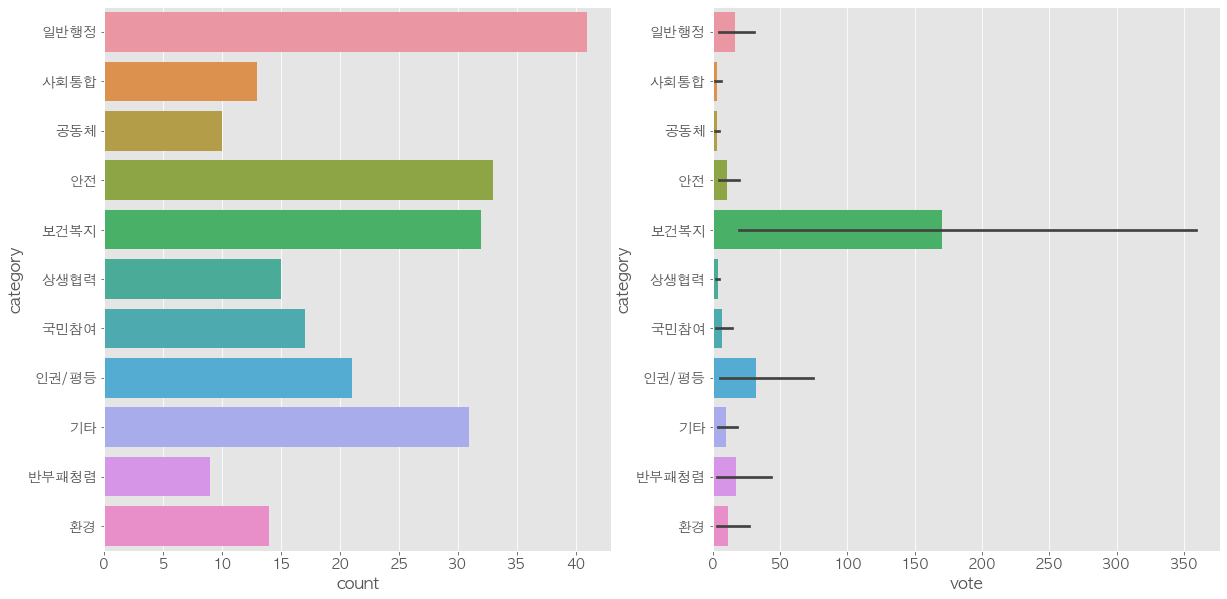

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,10)

# seggestion of categories
sns.countplot(data=df, y='category', ax=ax1)
# vote average of categories
sns.barplot(data=df, x='vote', y='category', ax=ax2)

In [9]:
# total votes of catergories
df_category_vote = pd.DataFrame(df.groupby(['category'])['vote'].sum())\
                                .reset_index().sort_values('vote', ascending=False)
df_category_vote.head()

,category,vote
4,보건복지,5447
9,일반행정,683
8,인권/평등,672
7,안전,354
2,기타,292


## Period

In [10]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df[['start', 'end']].head()

,start,end
0,2019-10-16,2020-01-13
1,2019-10-16,2020-01-13
2,2019-10-15,2020-01-12
3,2019-10-15,2020-01-12
4,2019-10-15,2020-01-12


In [11]:
df.dtypes

sgId                 int64
title               object
category            object
content             object
start       datetime64[ns]
end         datetime64[ns]
vote                 int64
author              object
dtype: object

In [12]:
df['start-date'] = df['start'].dt.date
df['start-month'] = df['start'].dt.year.astype(str)+"-"+df['start'].dt.month.astype(str)
df['start-weekday'] = df['start'].dt.dayofweek

In [13]:
df[['start-date', 'start-month', 'start-weekday']].head()

,start-date,start-month,start-weekday
0,2019-10-16,2019-10,2
1,2019-10-16,2019-10,2
2,2019-10-15,2019-10,1
3,2019-10-15,2019-10,1
4,2019-10-15,2019-10,1


In [14]:
weekday_map = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
df['weekday'] = df['start-weekday'].apply(lambda x : weekday_map[x])
df[['start-month', 'start-weekday', 'weekday']].head()

,start-month,start-weekday,weekday
0,2019-10,2,wed
1,2019-10,2,wed
2,2019-10,1,tue
3,2019-10,1,tue
4,2019-10,1,tue


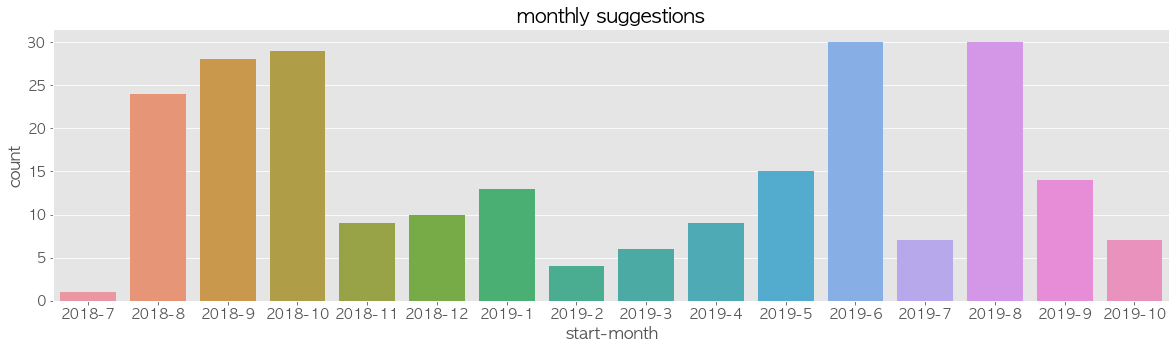

In [15]:
# monthly suggestions
plt.figure(figsize=(20,5))
plt.title('monthly suggestions')
sns.countplot(data=df.sort_values(by='start-date', ascending=True), x='start-month')

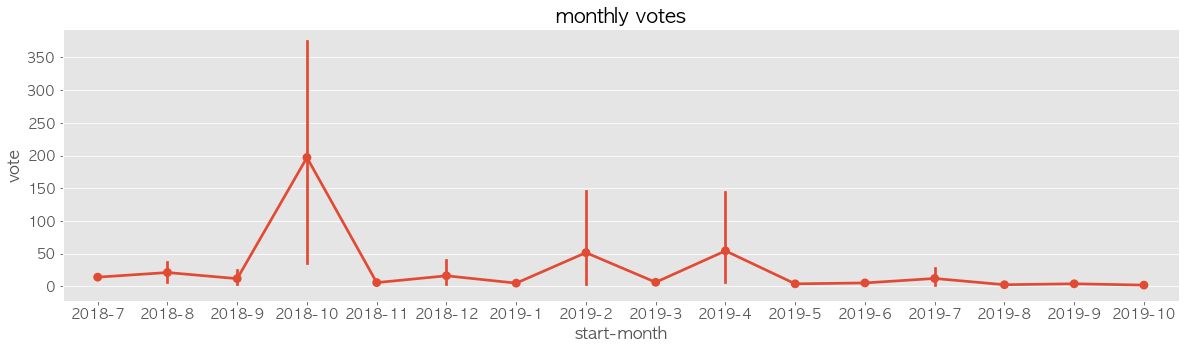

In [16]:
# monthly votes
plt.figure(figsize=(20,5))
plt.title('monthly votes')
sns.pointplot(data=df.sort_values(by='start-date', ascending=True), x='start-month', y='vote')

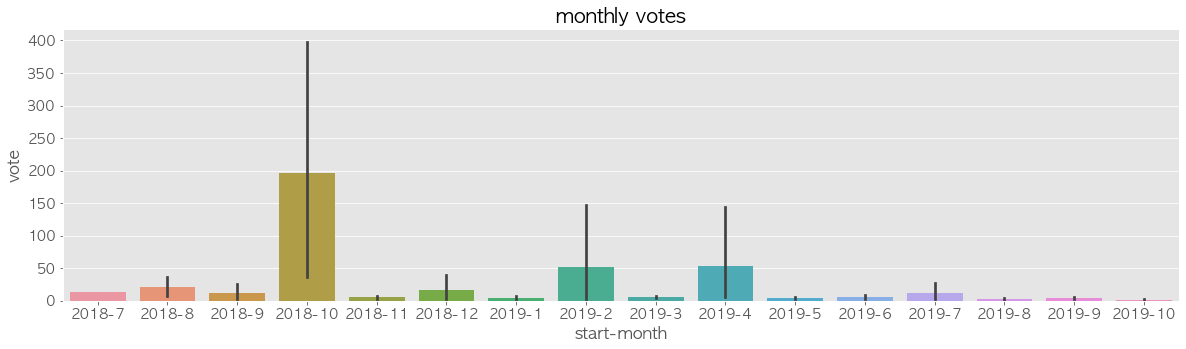

In [17]:
# monthly votes
plt.figure(figsize=(20,5))
plt.title('monthly votes')
sns.barplot(data=df.sort_values(by='start-date', ascending=True), x='start-month', y='vote')

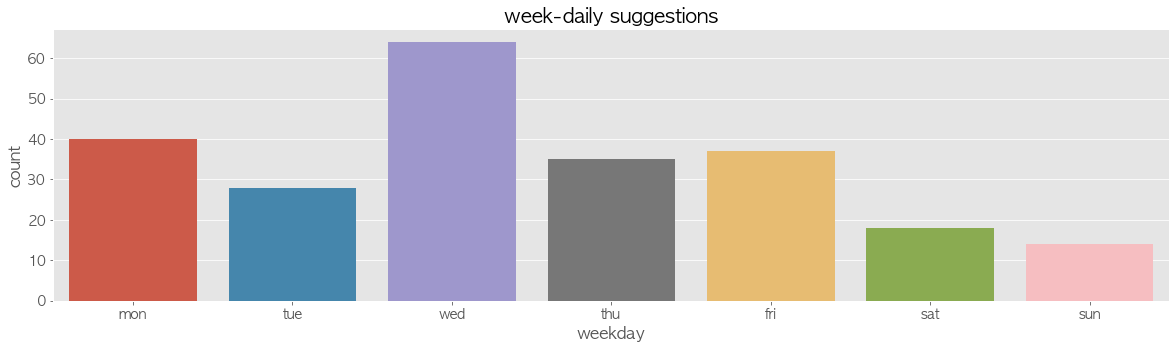

In [18]:
# week-daily suggestions
plt.figure(figsize=(20,5))
plt.title('week-daily suggestions')
sns.countplot(data=df.sort_values(by='start-weekday', ascending=True), x='weekday')

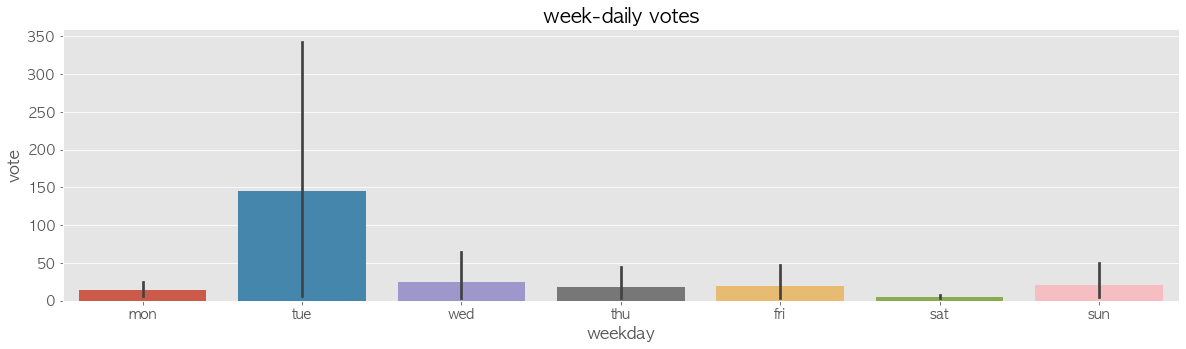

In [19]:
# week-daily votes
plt.figure(figsize=(20,5))
plt.title('week-daily votes')
sns.barplot(data=df.sort_values(by='start-weekday', ascending=True), x='weekday', y='vote')

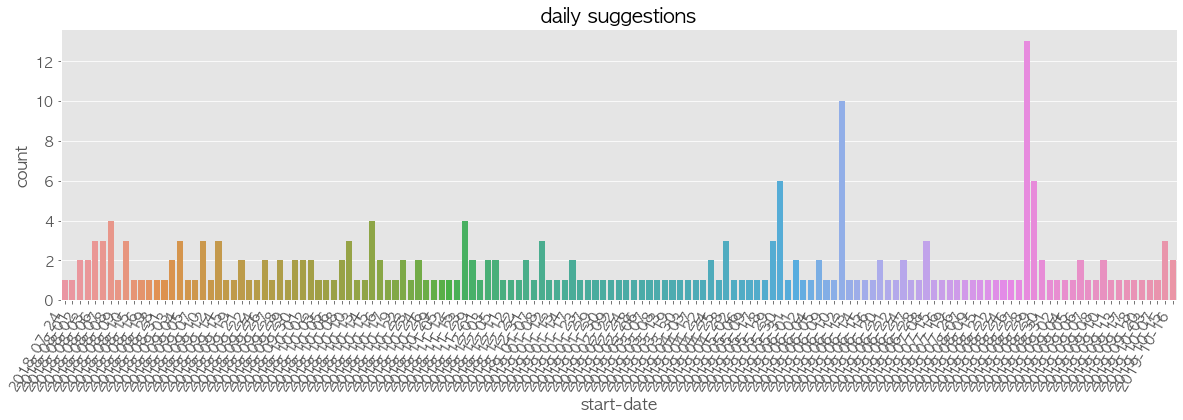

In [20]:
# daily suggestions
plt.figure(figsize=(20,5))
plt.title('daily suggestions')
plt.xticks(rotation=60, ha='right')
sns.countplot(data=df.sort_values(by='start-date', ascending=True), x='start-date')

In [21]:
df_06_10 = df[df['start']>'2019-06-10']
df_06_10['start-date'].value_counts()

2019-08-28    13
2019-06-12    10
2019-08-29     6
2019-07-08     3
2019-10-15     3
2019-10-16     2
2019-09-06     2
2019-06-24     2
2019-08-30     2
2019-09-10     2
2019-06-20     2
2019-08-31     1
2019-08-09     1
2019-09-20     1
2019-09-08     1
2019-06-16     1
2019-07-16     1
2019-08-15     1
2019-09-11     1
2019-07-19     1
2019-06-14     1
2019-06-28     1
2019-06-21     1
2019-08-22     1
2019-09-13     1
2019-08-24     1
2019-08-21     1
2019-08-26     1
2019-07-26     1
2019-06-15     1
2019-06-13     1
2019-06-22     1
2019-06-27     1
2019-09-04     1
2019-09-05     1
2019-08-07     1
2019-09-02     1
2019-10-07     1
2019-09-17     1
2019-09-18     1
2019-07-15     1
2019-09-07     1
2019-08-27     1
2019-10-03     1
Name: start-date, dtype: int64

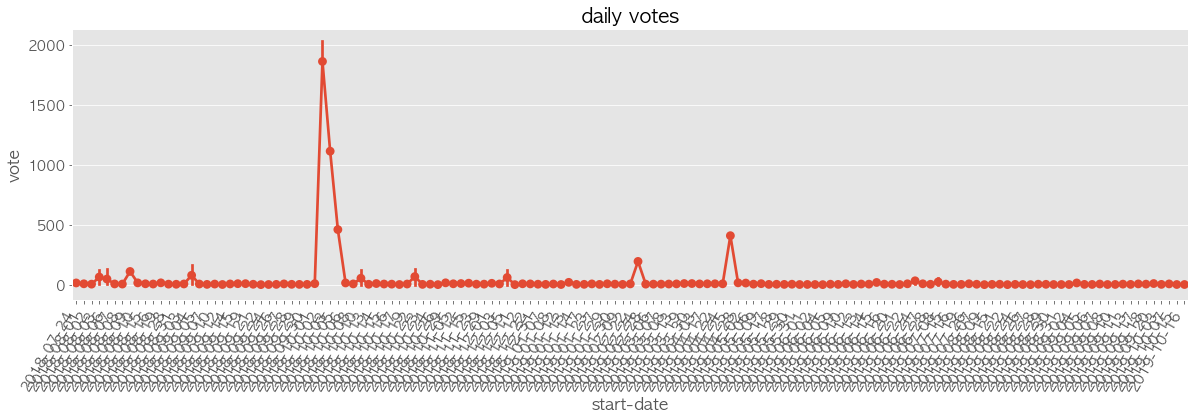

In [22]:
# daily votes
plt.figure(figsize=(20,5))
plt.title('daily votes')
plt.xticks(rotation=60, ha='right')
sns.pointplot(data=df.sort_values(by='start-date'), x='start-date', y='vote')

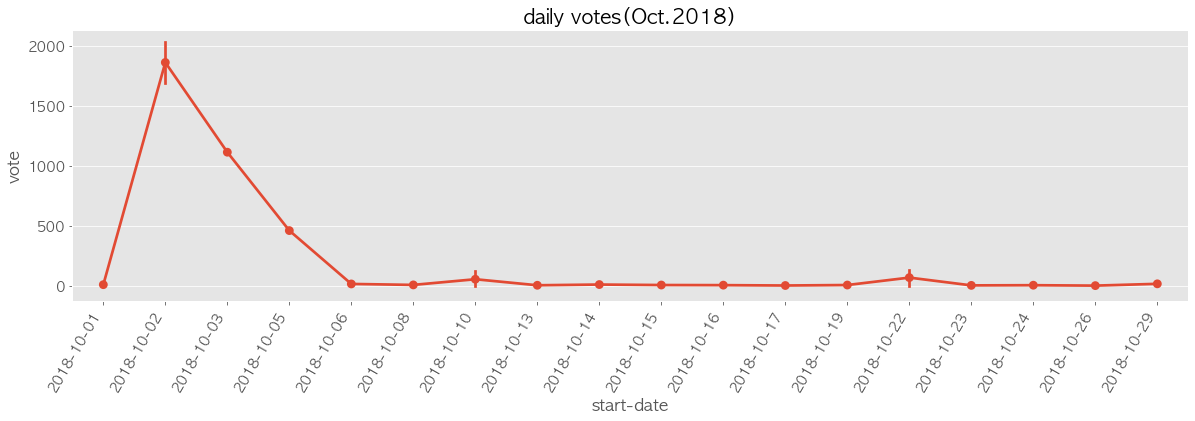

In [23]:
# check daily votes on Oct. 2018.
plt.figure(figsize=(20,5))
plt.title('daily votes(Oct.2018)')
plt.xticks(rotation=60, ha='right')

df_2018_10 = df[(df['start']>='2018-10-01') & (df['start']<'2018-11-01')]
sns.pointplot(data=df_2018_10.sort_values(by='start-date'), x='start-date', y='vote')

In [24]:
# sort suggestions more than 2000 votes
df.loc[df['vote']>2000, ['sgId', 'start', 'title', 'category', 'content']]

,sgId,start,title,category,content
179,64,2018-10-02,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...


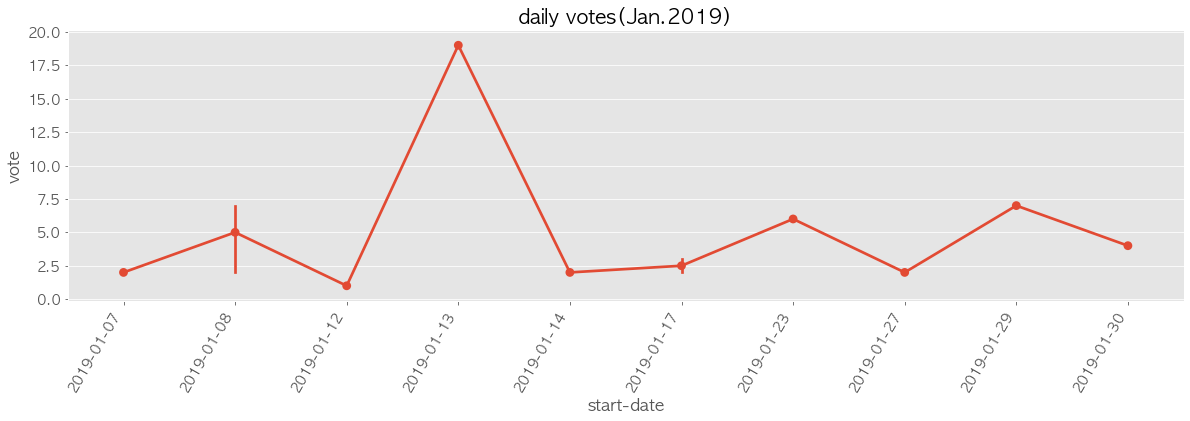

In [25]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('daily votes(Jan.2019)')

df_2019_01 = df[(df['start']>='2019-01-01') & (df['start']<'2019-02-01')]
sns.pointplot(data=df_2019_01.sort_values(by='start-date'), x='start-date', y='vote')

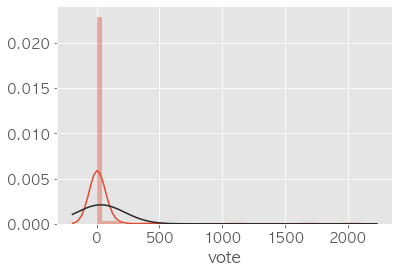

In [26]:
# We can check the distribution of votes, 
# but it is difficult to get samples because most of the votes are close to zero.
from scipy.stats import norm
sns.distplot(df['vote'], fit=norm)

In [27]:
# number of suggestions terminated
df[df['end']<'2020-02-11'].shape

(236, 12)

In [28]:
df['close'] = df['end']<'2020-02-11'

In [29]:
df['close'].value_counts()

True    236
Name: close, dtype: int64

In [30]:
preview_columns = ['sgId', 'title', 'category', 'content', 'vote']
df_top_vote = df.sort_values(by='vote', ascending=False).head(10)
df_top_vote[preview_columns]

,sgId,title,category,content,vote
179,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037
180,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693
178,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115
177,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460
106,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,409
119,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194
207,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167
160,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133
227,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,132
172,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126


In [31]:
# suggestions with over 100 votes
df_vote_100 = df.loc[df['vote'] > 100, preview_columns]
print('suggestions with over 100 votes:', len(df_vote_100))
df_vote_100

suggestions with over 100 votes: 13


,sgId,title,category,content,vote
106,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,409
119,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194
140,131,공직자 임용 및 선출직 입후보 배제 원칙 강화,반부패청렴,선출직이든 정무직이든 일반직이든 입법 행정 사법 3부 및 전국 지자체의모든 공무원은...,119
160,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133
172,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126
177,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460
178,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115
179,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037
180,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693
207,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167


In [32]:
# sort the highest number of suggestions in '일반행정' by vote
df[df['category'] == '일반행정'].sort_values(by='vote', ascending=False).head()

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
119,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019-02-24,2019-05-24,194,무한소,2019-02-24,2019-2,6,sun,True
207,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,2018-09-04,2018-12-02,167,NaN,2018-09-04,2018-9,1,tue,True
172,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,2018-10-10,2019-01-07,126,안전역량,2018-10-10,2018-10,2,wed,True
171,72,정부부처 공모사업을 한눈에 보고싶습니다.,일반행정,저는 지자체에서 혁신업무 및 기획업무를 담당하고있습니다.작은 지방이라 공모사업 선정...,2018-10-10,2019-01-07,33,혁신선두,2018-10-10,2018-10,2,wed,True
38,240,청와대공무직공개채용,일반행정,현재 각 공공기관이나 중앙부처등등 공공시설에서근무하는 청사미화원.조경.방호 등등.....,2019-08-28,2019-11-25,17,인생2모작,2019-08-28,2019-8,2,wed,True


## WordCloud

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=800):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumGothicExtraBold.otf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [34]:
from konlpy.tag import Kkma

kkma = Kkma()

In [35]:
%time kkma_content_nouns = kkma.nouns(''.join(str(df['content'].fillna(''))))
kkma_content_nouns[-10:]

CPU times: user 28.4 s, sys: 630 ms, total: 29 s
Wall time: 10.7 s


['차량내', '내', '질식', '질식사고', '사고', '발생', '대', '가지', '대책', '236']

In [36]:
def kkma_nouns_wordcloud(content):
    kkma_content_nouns = kkma.nouns(''.join(str(content.fillna(''))))
    displayWordCloud(' '.join(kkma_content_nouns))

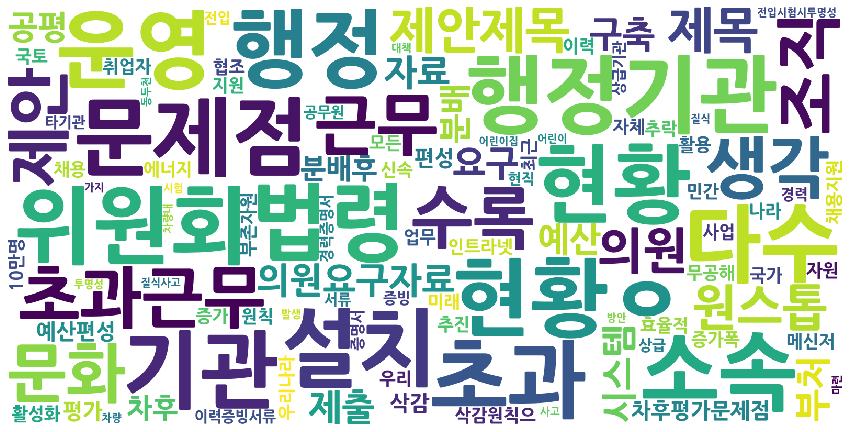

In [37]:
kkma_nouns_wordcloud(df['content'])

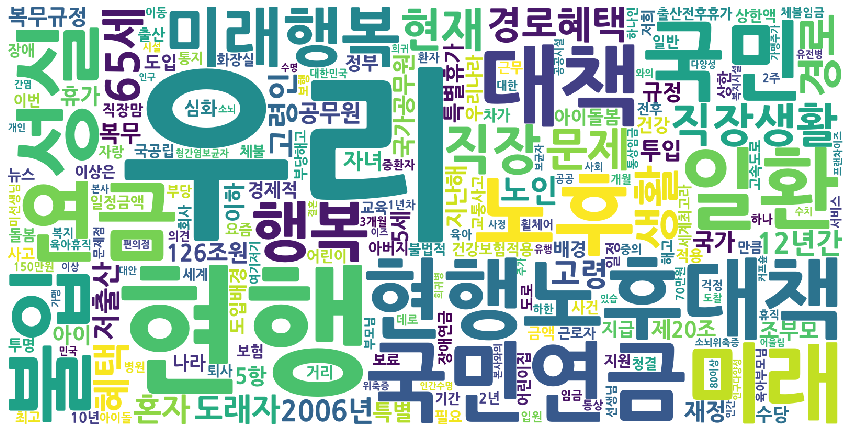

In [38]:
content = df.loc[df['category']=='보건복지', 'content']
kkma_nouns_wordcloud(content)

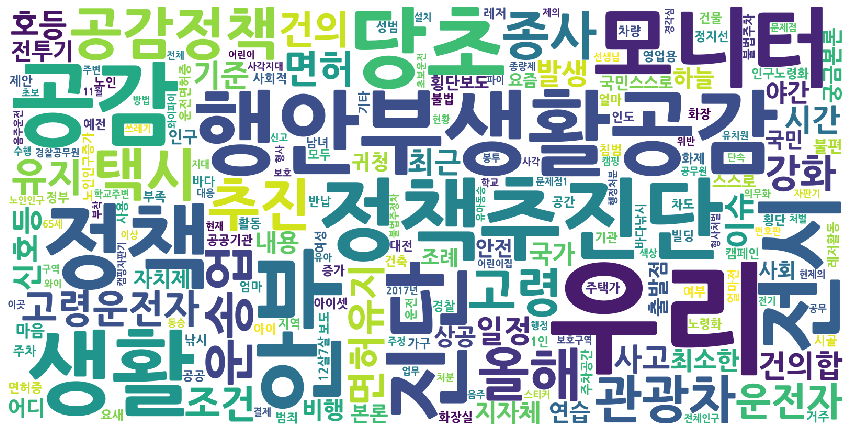

In [39]:
content = df.loc[df['category']=='안전', 'content']
kkma_nouns_wordcloud(content)

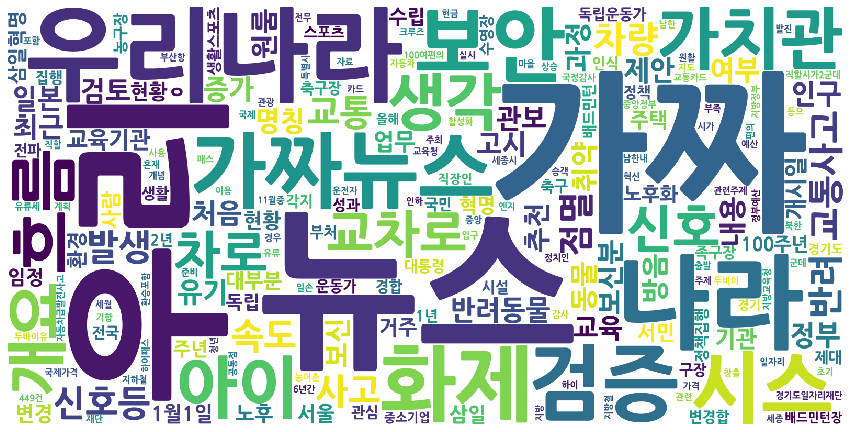

In [40]:
content = df.loc[df['category']=='기타', 'content']
kkma_nouns_wordcloud(content)

In [41]:
# creating for specific words only
import re

p = r'.*(난임|불임|임신).*'
pregnant = df[df['title'].str.match(p) | df['content'].str.match(p, flags=re.MULTILINE)]
pregnant.shape

(5, 13)

In [42]:
pregnant.sort_values(by='vote', ascending=False)

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
179,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2018-10-02,2018-12-30,2037,엄마란소리,2018-10-02,2018-10,1,tue,True
180,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",2018-10-02,2018-12-30,1693,곰돌이네,2018-10-02,2018-10,1,tue,True
178,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,2018-10-03,2018-12-31,1115,알지온,2018-10-03,2018-10,2,wed,True
102,169,체당금 관련 법안에 관해서 건의드립니다.,보건복지,우선 저는 10년가까이 근무했던 회사에서 퇴사한 후 2년이 다되도록 체불임금 및 퇴...,2019-05-02,2019-07-30,13,꿀떵이맘,2019-05-02,2019-5,3,thu,True
170,74,산부인과 초음파비용,보건복지,결혼한 후 1년이내 피임을 하지않는범주에서 자녀가생기지 않으면 난임부부라고 말합니다...,2018-10-13,2019-01-10,3,모모,2018-10-13,2018-10,5,sat,True


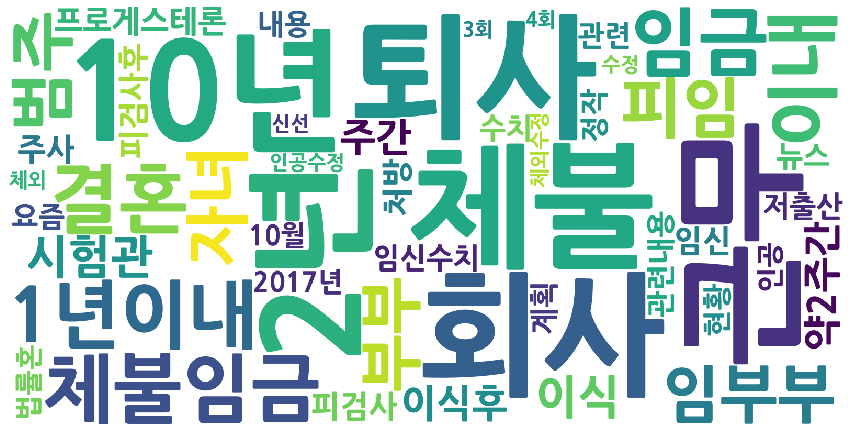

In [43]:
content = pregnant['content']
kkma_nouns_wordcloud(content)

In [44]:
p = r'.*(미세먼지).*'
airpollution = df[df['title'].str.match(p) | df['content'].str.match(p, flags=re.MULTILINE)]
airpollution

,sgId,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
54,221,아파트 건설 현장,환경,현재 문제점1.청소시 먼지2.공사ㅈ기초 발주및 건물 입상시제안 취지1.소음.미세먼...,2019-07-15,2019-10-12,4,올리는 시민,2019-07-15,2019-7,0,mon,True
63,209,"맑은하늘, 가족들이 즐겁게 나들이",환경,"맑은하늘, 가족들이 즐겁게 나들이 할 수 있는환경인 대한민국이 되었으면 좋겠어요미세...",2019-06-21,2019-09-18,1,선진,2019-06-21,2019-6,4,fri,True
116,155,미세 먼지 저감 아이디어 - 자동차가 공기 청정기가 된다면?,환경,아래와 같이 정리했듯이 자동차를 공해의 주범이 아닌 공기 청정의 주역으로 바꾸는 아...,2019-03-07,2019-06-04,4,봉팔버미,2019-03-07,2019-3,3,thu,True
192,52,저속으로 이용되고 있는 수도권 고속도로 운영방식 개선,기타,(현 황)정부에서는 교통의 원활한 흐름을 위해 정부예산 또는 민간투자(민자)를 ...,2018-09-22,2018-12-20,0,사회적가치,2018-09-22,2018-9,5,sat,True


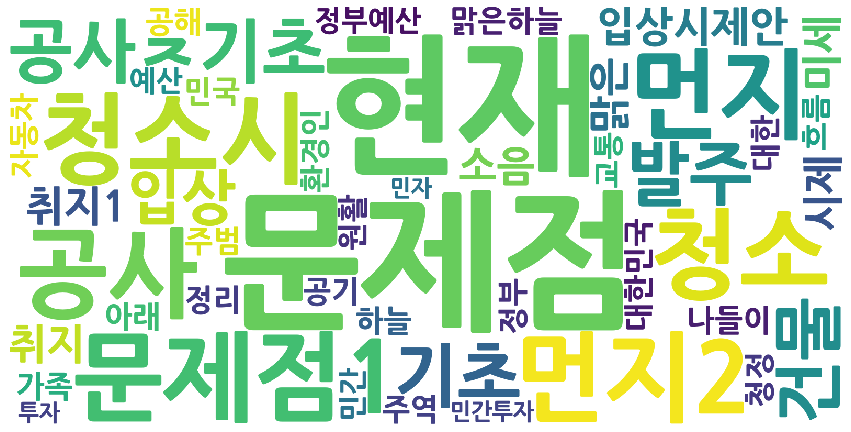

In [45]:
content = airpollution['content']
kkma_nouns_wordcloud(content)

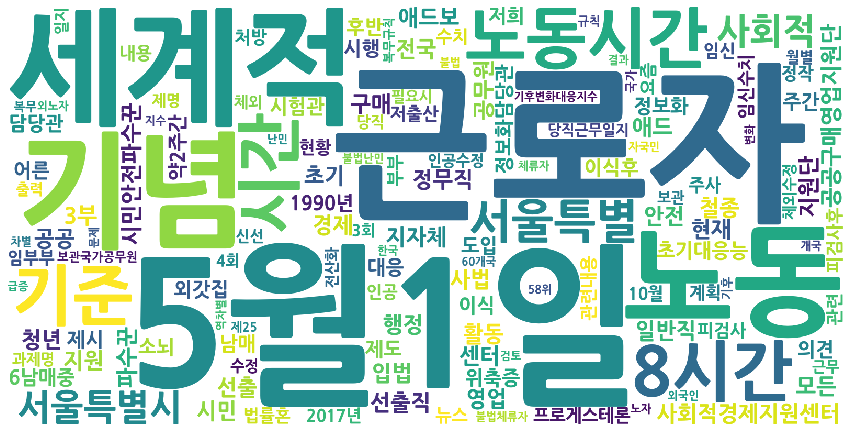

In [46]:
content = df_vote_100['content']
kkma_nouns_wordcloud(content)